# Agent interaction analysis
## Step by step data extraction

In [11]:
# Imports
import pandas as pd
# from egg.core.interaction import Interaction
import torch
from sklearn.decomposition import PCA
from pathlib import Path
from matplotlib import pyplot as plt
from egg.zoo.pop.scripts.analysis_tools.analysis import interaction_to_dataframe
import seaborn as sns
# used in a later part of the script :
# import numpy as np


In [16]:
# Path to your interaction files
base_path = Path("/Users/u203445/Documents/projects/EGG/")

# 1st file is a full population playing the Lazaridou communication game
# 2nd file is the full population trained normally but tested on a game where both target and distractor go through augmentations
# 3rd file is a vgg-vgg pair with augmentations only on the distractors (target is the same as it was during training)
# 4th file is a vgg-vgg pair with augmentations on target and distractors
# interaction_files = ["cont_interactions_2","cont_interactions_aug","vgg_distaugment_interactions","vgg_allaugment_interactions", "noisy_channel", "separate_aug"]
# interaction_files = [
#     "./noisy_channel_0.1", 
#     "./noisy_channel_0.5", 
#     "0.1['inception']['vgg11']",
#     "0.1['resnet152']['vgg11']",
#     "0.1['vgg11']['inception']",
#     "0.1['vgg11']['resnet152']",
#     "0.1['vgg11']['vgg11']",
#     "0.1['vgg11']['vit']",
#     "0.1['vit']['vgg11']",
#     "0.5['inception']['vgg11']",
#     "0.5['resnet152']['vgg11']",
#     "0.5['vgg11']['inception']",
#     "0.5['vgg11']['resnet152']",
#     "0.5['vgg11']['vgg11']",
#     "0.5['vgg11']['vit']",
#     "0.5['vit']['vgg11']"
# ]
# interaction_files = [
#     "color_jitter['inception']['vgg11']",    
#     "color_jitter['resnet152']['vgg11']",    
#     "color_jitter['vgg11']['inception']",    
#     "color_jitter['vgg11']['resnet152']",    
#     "color_jitter['vgg11']['vgg11']",    
#     "color_jitter['vgg11']['vit']",    
#     "color_jitter['vit']['vgg11']",    
#     "gaussian_blur['inception']['vgg11']",    
#     "gaussian_blur['resnet152']['vgg11']",    
#     "gaussian_blur['vgg11']['inception']",    
#     "gaussian_blur['vgg11']['resnet152']",    
#     "gaussian_blur['vgg11']['vgg11']",    
#     "gaussian_blur['vgg11']['vit']",    
#     "gaussian_blur['vit']['vgg11']",    
#     "resize['inception']['vgg11']",    
#     "resize['resnet152']['vgg11']",    
#     "resize['vgg11']['inception']",    
#     "resize['vgg11']['resnet152']",    
#     "resize['vgg11']['vgg11']",
#     "resize['vgg11']['vit']",
#     "resize['vit']['vgg11']",
#     "resize",
#     "color_jitter",
#     "gaussian_blur"
# ]
# interaction_files = [
#     "None['inception']['vgg11']",
#     "None['vgg11']['resnet152']",
#     "None['vit']['vgg11']",
#     "None['resnet152']['vgg11']",
#     "None['vgg11']['vgg11']",
#     "None['vgg11']['inception']",
#     "None['vgg11']['vit']",
#     "fullpop",
# ]
interaction_files = [
    "gaussian_blur['inception']['vgg11']",    
    "gaussian_blur['resnet152']['vgg11']",    
    "gaussian_blur['vgg11']['inception']",    
    "gaussian_blur['vgg11']['resnet152']",    
    "gaussian_blur['vgg11']['vgg11']",    
    "gaussian_blur['vgg11']['vit']",    
    "gaussian_blur['vit']['vgg11']",
    "gaussian_blur['vgg11','vit','resnet152', 'inception']['vgg11','vit','resnet152', 'inception']"  
]
# interaction_files = ["None['vit']['inception']"]
inters = [torch.load(base_path / file) for file in interaction_files]
df_inters = [interaction_to_dataframe(inter) for inter in inters] # <-- put interactions into dataframes which are easy to handle 
# print("available information in dataframe : \n", df_inters[0].columns)



In [11]:
# for i,df_inter in enumerate(df_inters):
#     print(df_inter.to_csv(base_path / (interaction_files[i] + ".csv")))
df_inters[-1].shape

(79872, 22)

### A few numbers to explain the data

In [17]:
# check performance scores :
for i, df_inter in enumerate(df_inters):
    acc = (df_inter.batch_number % 64 == df_inter.receiver_output).sum().item() / len(df_inter.receiver_output)
    if df_inter.sender_idx.nunique() != 1 and df_inter.recv_idx.nunique() != 1:
        print(f"---------- {interaction_files[i]} ----------")
        print(f"average accuracy = {acc}")
        print(f"{df_inter.sender_idx.nunique()} sender, {df_inter.recv_idx.nunique()} receivers")
        for sidx in range(df_inter.sender_idx.nunique()):
            for ridx in range(df_inter.recv_idx.nunique()):
                select_inters = df_inter[df_inter.sender_idx == sidx][df_inter.recv_idx == ridx]
                _acc = (select_inters.batch_number % 64 == select_inters.receiver_output).sum().item() / len(select_inters.receiver_output)
                print(f"{sidx} - {ridx} accuracy = {_acc}")
    else :
        print(f"{interaction_files[i]} accuracy = {acc}")

    # print(df_inter.sample())

gaussian_blur['inception']['vgg11'] accuracy = 0.6965144230769231
gaussian_blur['resnet152']['vgg11'] accuracy = 0.8070913461538461
gaussian_blur['vgg11']['inception'] accuracy = 0.6167868589743589
gaussian_blur['vgg11']['resnet152'] accuracy = 0.7612179487179487
gaussian_blur['vgg11']['vgg11'] accuracy = 0.7167467948717948
gaussian_blur['vgg11']['vit'] accuracy = 0.6410256410256411
gaussian_blur['vit']['vgg11'] accuracy = 0.6889022435897436
---------- gaussian_blur['vgg11','vit','resnet152', 'inception']['vgg11','vit','resnet152', 'inception'] ----------
average accuracy = 0.8218649839743589
4 sender, 4 receivers
0 - 0 accuracy = 0.8171073717948718
0 - 1 accuracy = 0.7007211538461539
0 - 2 accuracy = 0.7938701923076923
0 - 3 accuracy = 0.6925080128205128
1 - 0 accuracy = 0.7279647435897436
1 - 1 accuracy = 0.9559294871794872
1 - 2 accuracy = 0.8465544871794872
1 - 3 accuracy = 0.75
2 - 0 accuracy = 0.8389423076923077
2 - 1 accuracy = 0.8665865384615384
2 - 2 accuracy = 0.9603365384615

C:\Users\u203445\AppData\Local\Temp\ipykernel_18784\3983398691.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  select_inters = df_inter[df_inter.sender_idx == sidx][df_inter.recv_idx == ridx]


In [61]:
# given the same image, how different are the messages given by different senders
def distance(a,b):
    # this isn't the manhattan distance... can't remember the name, will have to look up if its good enough
    raw_differences = 0
    for n in range(16):
        raw_differences += a.set_index('batch_number')[f"dim_{n}"]**2 - b.set_index('batch_number')[f"dim_{n}"]**2
    return raw_differences**0.5

# display distances
for i,df_inter in enumerate(df_inters):
    df_distances = pd.DataFrame(columns=["distance","idx1","idx2"])
    for idx1 in range(4): # TODO : change to all available different senders
        for idx2 in range(4): # TODO : change to all available different senders
            if idx1 != idx2:
                a = df_inter[df_inter.sender_idx == idx1]
                b = df_inter[df_inter.sender_idx == idx2]
                # distances.append(distance(a,b))
                _dist=distance(a,b)
                df_distances["distance"] += _dist
                df_distances["idx1"] += [idx1] *len(_dist)
                df_distances["idx2"] += [idx2] *len(_dist)
                sns.boxplot(df_distances)
    # print(f"\t", df_distances)

ValueError: operands could not be broadcast together with shapes (0,) (4992,) 

## Begining of a PCA analysis
lets make an n component PCA with the scikit-learn tool, to get a visual idea of clusters and their correspondance to the pretrained 'human' classes

c:\Users\u203445\Miniconda3\envs\quiche\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\u203445\Miniconda3\envs\quiche\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\u203445\Miniconda3\envs\quiche\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpreta

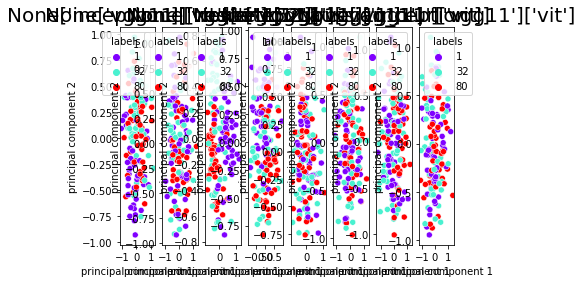

In [ ]:
## Parameter Selection
# select which senders and which pretraining class labels to visualise 
_chosen_sender_index = [0] # _chosen_sender_index = [0,1,2,3]
_chosen_labels = [1, 32, 80] # _chosen_labels = [i for i in range(100)]
# PCA parameters
n_components=10
# PCA dimensions to show on graph
prin_comp_A = 1
prin_comp_B = 2


df_pcas = []
fig, axes = plt.subplots(1,len(df_inters)) 
# lets get those sender specific PCAs
for i,df_inter in enumerate(df_inters):
    # taking only the interactions that have the matching indexes for the chosen sender and the class labels
    selectedsender_interactions = df_inter[df_inter.sender_idx.isin(_chosen_sender_index)][df_inter.labels.isin(_chosen_labels)] 

    # PCA
    pca = PCA(n_components)
    x = selectedsender_interactions.loc[:, selectedsender_interactions.columns.str.contains('dim')]
    principalComponents = pca.fit_transform(x)
    df_pca = pd.DataFrame(data = principalComponents
                , columns = [f'principal component {i+1}' for i in range(n_components)])
    ## If we were to reuse those dimensions, this is what they look like : 
    # print(df_pca[['principal component 1','principal component 2']].sample(3))

    # plotting PCA
    sns.scatterplot(df_pca[f'principal component {prin_comp_A}'],
        df_pca[f'principal component {prin_comp_B}'], 
        hue = selectedsender_interactions.set_index(df_pca.index).labels,
        ax=axes[i],
        palette='rainbow',
    ).set_title(interaction_files[i], fontsize = 20),
    
    # ax.grid()

## Some other basic things
Looking at the message distribution for intuition of where the information is hidden

In [ ]:
melted_dfs = []
for df_inter in df_inters:
    # Setting each dimension column as a categoric variable (called dim) of the same type (message value)
    _melted_df = df_inter.melt(["sender_idx","loss_idx", "recv_idx", "labels", "receiver_output", "batch_number"], var_name="dim", value_name="message_value")
    _melted_df.dim.replace([f"dim_{n}" for n in range(16)],[n for n in range(16)], inplace=True)
    melted_dfs.append(_melted_df)
print(melted_dfs[0].sample(3)) # have a look here if needed 

       sender_idx  loss_idx  recv_idx  labels  receiver_output  batch_number  \
1904            0         0         0      96               58          1904   
66339           0         0         0      28               62          1443   
62776           0         0         0      61               28          2872   

       dim  message_value  
1904     0       0.307648  
66339   13       0.054350  
62776   12       0.987815  


### Message Distribution

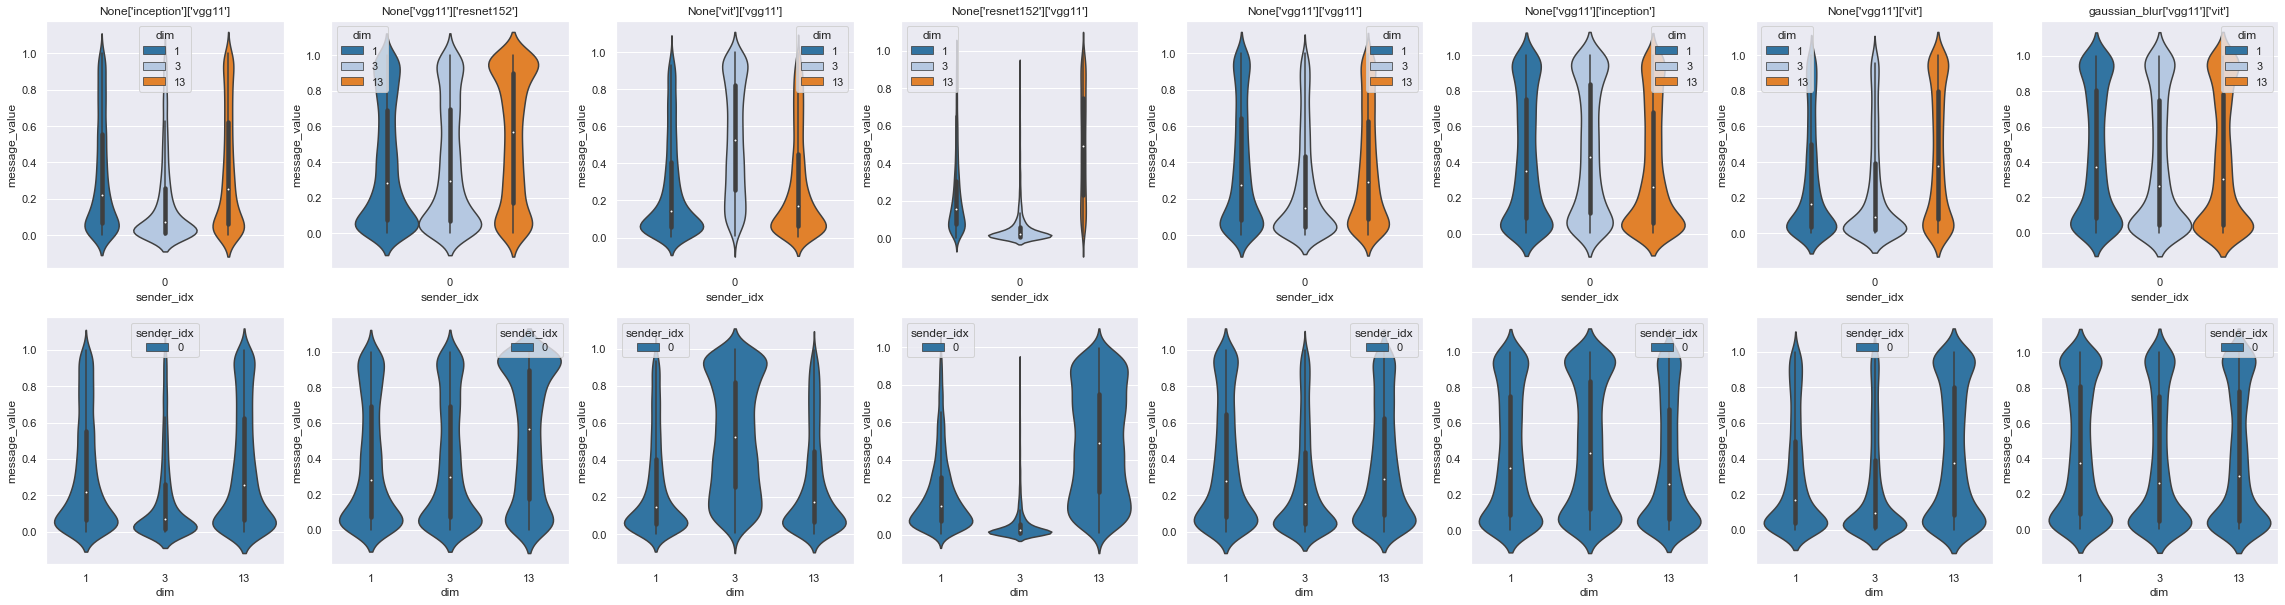

In [ ]:

## Parameter Selection
# select which senders and which dimension to visualise 
_chosen_sender_index = [0,3]   # _chosen_sender_index = [0,1,2,3]
_chosen_dimensions= [1, 3, 13] # _chosen_labels = [i for i in range(16)]

sns.set(rc={'figure.figsize':(5*len(melted_dfs),10)})
fig, axes = plt.subplots(2,len(melted_dfs)) 

# extract and plot
for i,melted_df in enumerate(melted_dfs):
    melted_df = melted_df[melted_df.sender_idx.isin(_chosen_sender_index)][melted_df.dim.isin(_chosen_dimensions)] # filtering senders
    sns.violinplot(x=melted_df.sender_idx, y=melted_df.message_value, hue=melted_df.dim, palette=sns.color_palette("tab20",16),ax=axes[0,i]).set_title(interaction_files[i])
    sns.violinplot(x=melted_df.dim, y=melted_df.message_value, hue=melted_df.sender_idx, palette=sns.color_palette("tab20",16),ax=axes[1,i])
    

# WIP : maybe add some statistical testing
# the way the violins look allow us to know where to set the saturation point were we to discretise

A quick look at the data distribution for messages in each dimension

Now we check if data distribution is modified by the class of the represented image (which it should if it wants to discriminate images)

C:\Users\u203445\AppData\Local\Temp\ipykernel_9932\3036899652.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  _df = _df[melted_df.sender_idx.isin(_chosen_sender_idxs)]
C:\Users\u203445\AppData\Local\Temp\ipykernel_9932\3036899652.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  _df = _df[melted_df.dim.isin(_chosen_dimensions)]
C:\Users\u203445\AppData\Local\Temp\ipykernel_9932\3036899652.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  _df = _df[melted_df.sender_idx.isin(_chosen_sender_idxs)]
C:\Users\u203445\AppData\Local\Temp\ipykernel_9932\3036899652.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  _df = _df[melted_df.dim.isin(_chosen_dimensions)]
C:\Users\u203445\AppData\Local\Temp\ipykernel_9932\3036899652.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  _df = _df[melted_df.sender_idx.isin(_chosen_sende

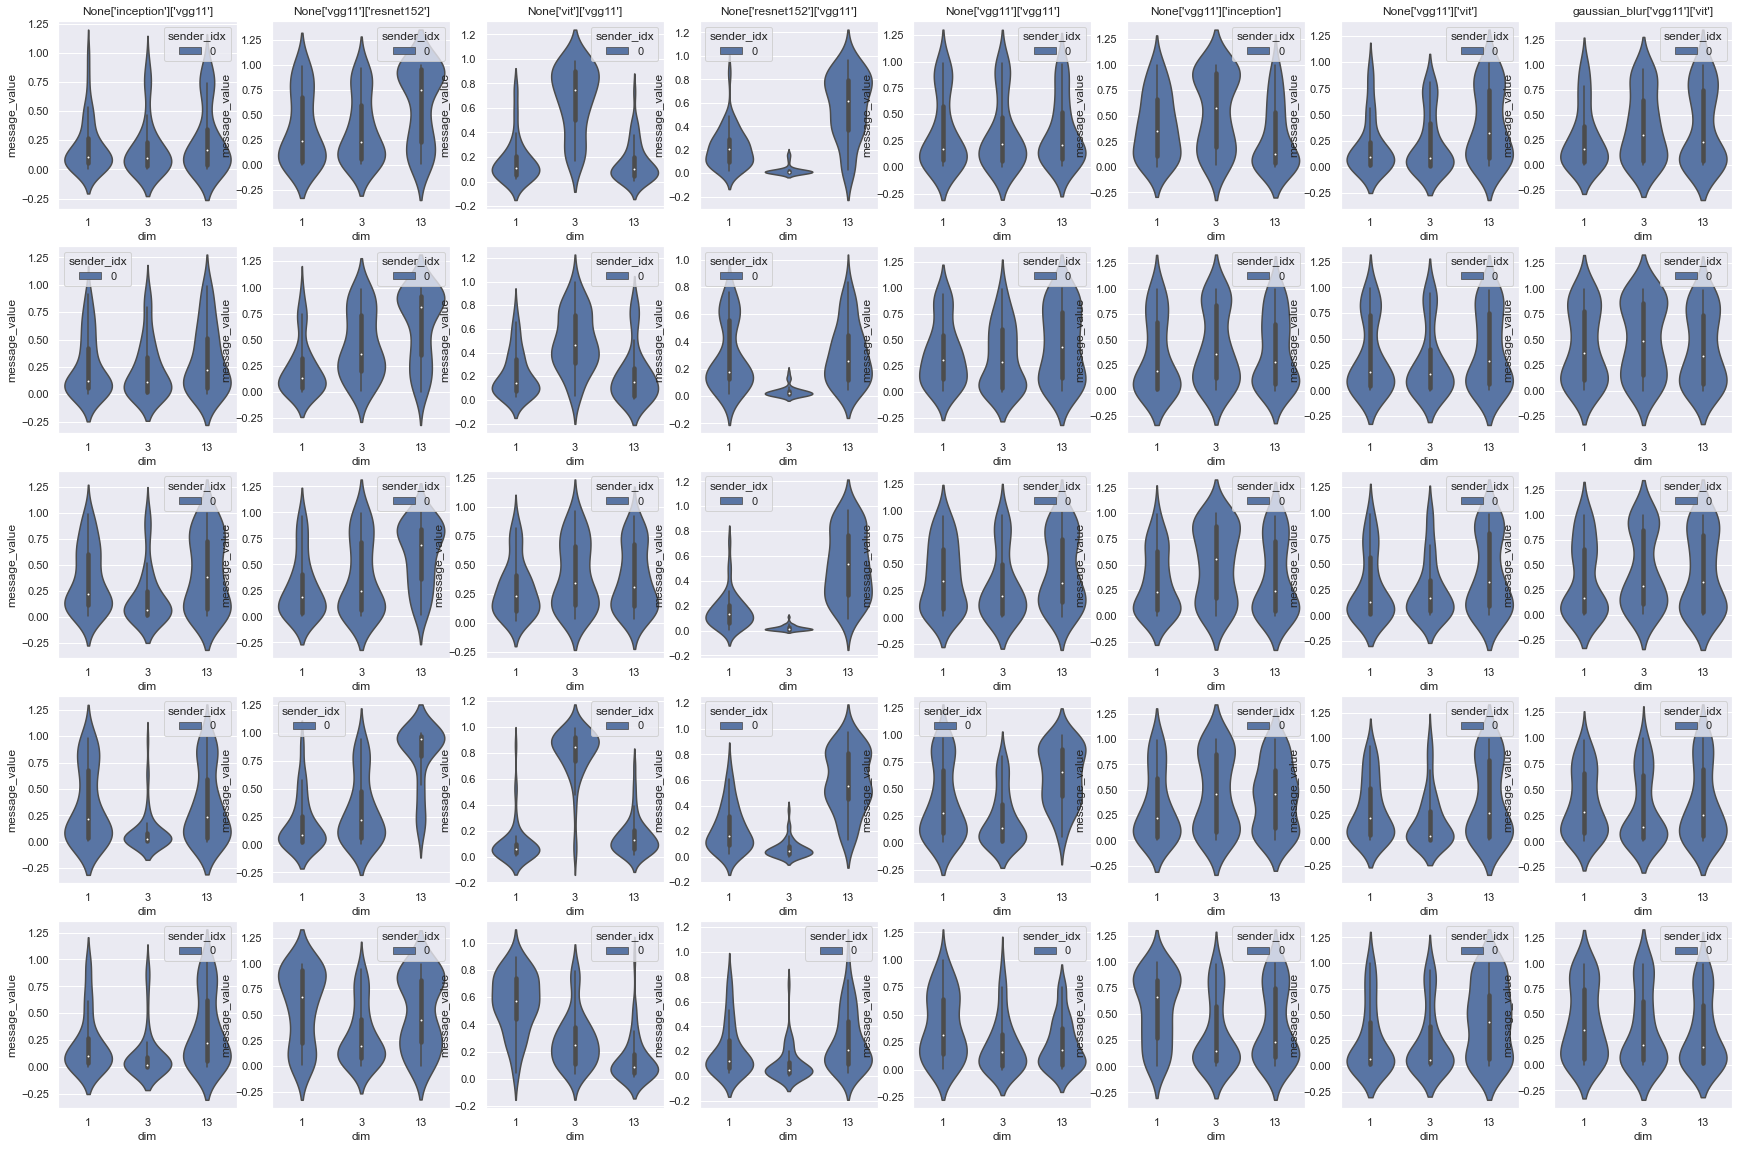

In [ ]:
## Parameter Selection
# select which senders and which classes to visualise 
_chosen_sender_idxs = [0,1,2,3]
_chosen_labels = torch.randint(0,100,[5]) # three random labels
_chosen_dimensions= [1, 3, 13] # _chosen_labels = [i for i in range(16)]


sns.set(rc={'figure.figsize':(10*len(_chosen_dimensions),4*len(_chosen_labels))})
fig, axes = plt.subplots(len(_chosen_labels),len(melted_dfs)) 

for i,melted_df in enumerate(melted_dfs):
    for j, label in enumerate(_chosen_labels):
        _df = melted_df[melted_df.labels==label.item()]
        _df = _df[melted_df.sender_idx.isin(_chosen_sender_idxs)]
        _df = _df[melted_df.dim.isin(_chosen_dimensions)]
        if len(_df) != 0:
            sns.violinplot(x=_df.dim, y=_df.message_value, hue=_df.sender_idx, ax=axes[j,i]).set_title(interaction_files[i] if j == 0 else None)

# We can see variations in dimensional distribution depending on the pre-training classes. Each sender seems to encode it in a similar manner ! 
# (which can be understood as either an approximation of the actual clustering, or perhaps the beginning of an analysis of model capacities in out-of-scope contexts)
# vit, the agent with the most different representation, is in orange (sender_idx = 1). We can see it is always using slightly different communication distributions
# vgg (blue, idx = 0) seems to be the worst tricked by data_augmentation

### Dimension correlation

In [ ]:
# new imports, can't escape numpy
import numpy as np

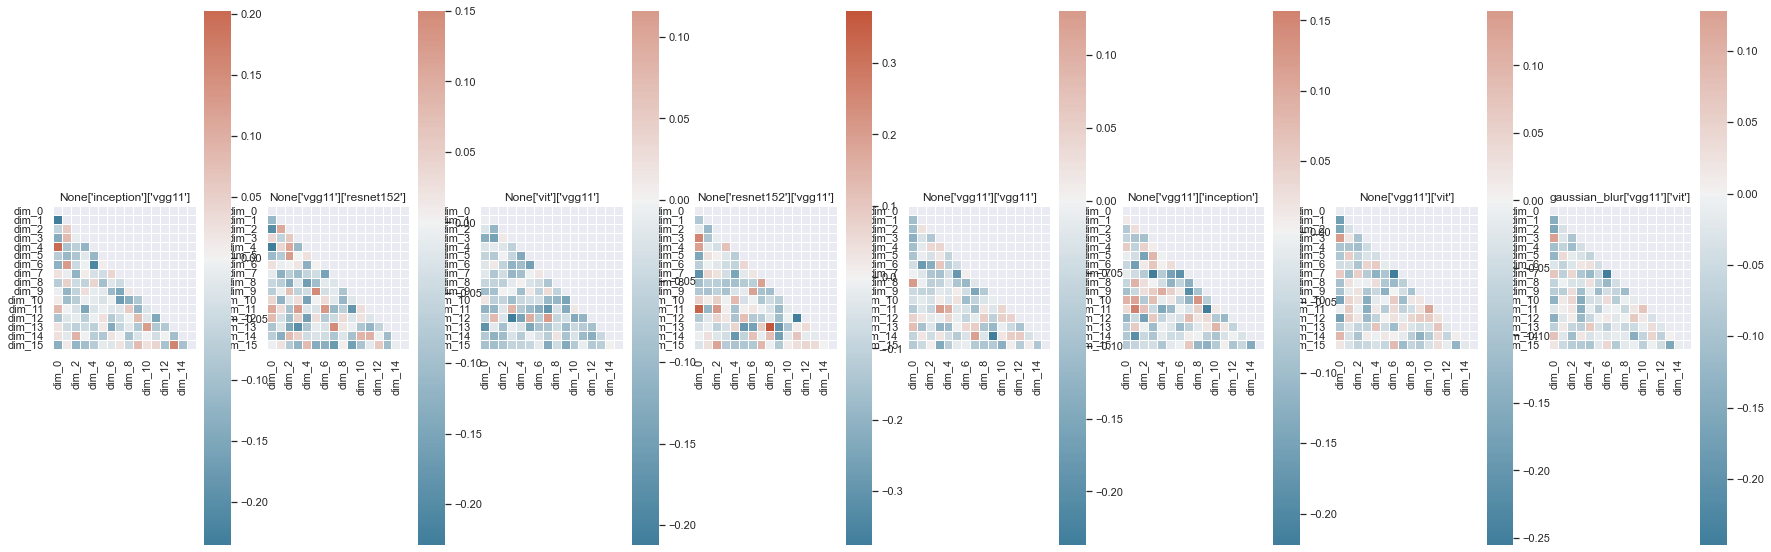

In [ ]:
# Ok. Correlation between dimensions now. Are any dimensions unnecessary ?
fig, axes = plt.subplots(1,len(df_inters)) 
for i,df_inter in enumerate(df_inters):
    # Compute the correlation matrix
    # (just on the dims, not on the rest of the information in interactions)
    corr = df_inter.loc[:,df_inter.columns.str.contains('dim')].corr()
    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5},ax=axes[i]).set_title(interaction_files[i])

# looks quite independant no ? with that in mind they'd all be necessary.

lets add :
* Independance of dims test
* entropy of pop languages vs one on one languages
* 